<a href="https://colab.research.google.com/github/pripalazzo/Estastistica_com_Python/blob/main/Aula_Projeto_%C3%A1rvores_de_decis%C3%A3o_e_florestas_aleat%C3%B3rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Árvore de Decisão e Florestas Aleatórias

Entendendo o contexto do assunto:
Para este projeto foi explorado os dados disponíveis abertos [LendingClub.com](www.lendingclub.com). 

Os dados trabalhados foram referentes a empréstimos de 2007-2010 obtidos do endereço: (https://www.lendingclub.com/info/download-data.action), não mais disponíveis pela plataforma, somente o csv em anexo. O csv fornecido já possui valores NA limpos.

Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que possuem dinheiro (investidores). Os investidores gostam de investir em pessoas que mostram um perfil com alta probabilidade de pagamento (baixando o risco). O modelo visa prever o risco envolvido do não pagamento.

As colunas do arquivo representa:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

In [58]:
# Importação das bibliotecas usuais para pandas e plotagem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#Usando pandas para ler loan_data.csv como um DataFrame chamado loans
loans = pd.read_csv('loan_data.csv')

In [60]:
#Analisando o formato do Dataframe com os métodos info(), head(), e describe() em loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [61]:
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [62]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Análise Exploratória de Dados

Text(0.5, 0, 'FICO')

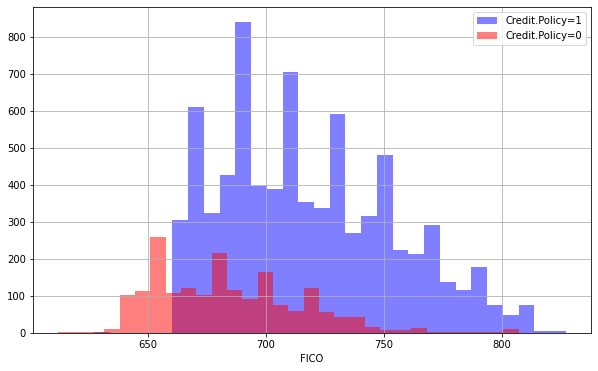

In [63]:
#Recursos de seaborn e pandas para visualização de dados
#Abaixo um histograma de duas distribuições FICO umas sobre as outras, uma para cada um dos valores possíveis de credit.policy 
#Utilizado .hist() incorporado ao pandas

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

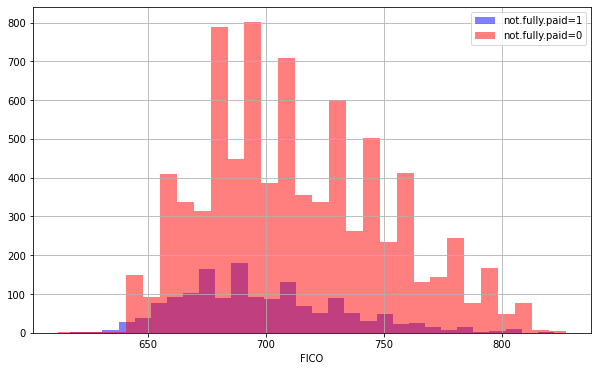

In [64]:
#Histograma semelhante ao anterior, mas dessa vez com a coluna not.fully.paid

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

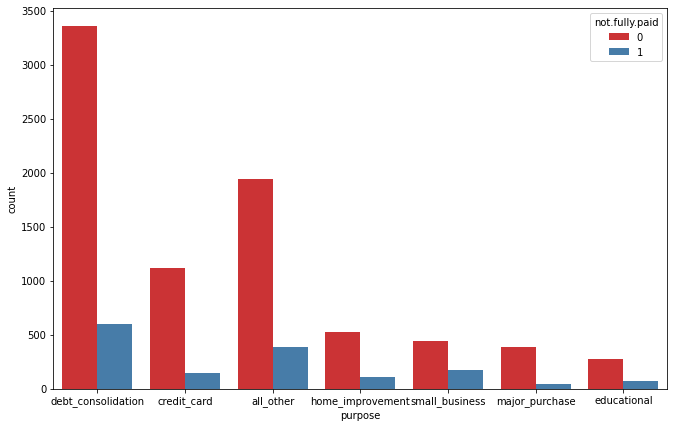

In [65]:
#Criado um countplot usando seaborn mostrando a contagens de empréstimos por finalidade, com a matiz de cor definido por not.fully.paid
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

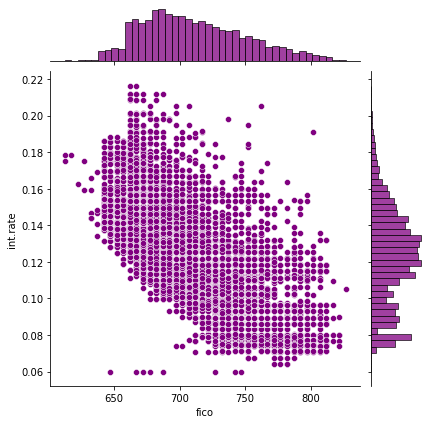

In [66]:
#Verificando a tendência entre o índice FICO e a taxa de juros. Recriando o seguinte jointplot
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

# Iniciando o modelo de classificação de florestas aleatórias

In [67]:
#Verificando loans.info() novamente
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Recursos obrigatórios

Será utilizada a coluna ** purpose ** como categórica.

E com isso transformá-las usando variáveis dummys para que Sklearn possa compreendê-las. Isso será feito em um passo de limpeza usando pd.get_dummies.

** Criação de uma lista de 1 elemento contendo a string 'purpose', chamada de  cat_feats. **

In [68]:
cat_feats = ['purpose']

** Agora use "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um DataFrame maior fixo que tenha novas colunas de recursos com variáveis dummy. Chame este dataframe de final_data. **

In [69]:
#Utilizando o "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um DataFrame maior fixo que tenha novas colunas de recursos com 
#variáveis dummy. Dataframe chamado de final_data.

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [70]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [71]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Divisão Treino-Teste de dados

In [72]:
# Importando sklearn para dividir os dados em um conjunto de treinamento e um conjunto de testes

from sklearn.model_selection import train_test_split

In [73]:
#not.fully.paid = não pago integralmente

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Árvore de Decisão: treinando o modelo

In [74]:
# Treinamento iniciado com uma única árvore de decisão
# Importação do DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [75]:
#Criando uma instância de DecisionTreeClassifier() chamada dtree e informe com os dados de treinamento

dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Árvore de Decisão: previsões e avaliação

In [77]:
predictions = dtree.predict(X_test)

In [78]:
#Fazendo previsões do conjunto de teste, um relatório de classificação e uma matriz de confusão.

from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.21      0.20       443

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.74      0.74      2874



In [80]:
print(confusion_matrix(y_test,predictions))

[[2019  412]
 [ 349   94]]


## Floestas Aleatórias: treinando o modelo

In [81]:
# Iniciaremos com treinamento do nosso modelo
# Criado uma instância da classe RandomForestClassifier e ajustado ao dados de treinamento da etapa anterior

from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=600)

In [83]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Previsões e Avaliação

Previsão dos valores do y_test e avaliação do modelo.

In [84]:
#Previsão da classe de not.fully.paid para os dados X_test

predictions = rfc.predict(X_test)

** Agora crie um relatório de classificação dos resultados. Você recebe algo estranho ou algum tipo de aviso? **

In [85]:
# Criando um relatório de classificação dos resultados

from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [87]:
# Impressão daa Matriz de Confusão para as previsões

print(confusion_matrix(y_test,predictions))

[[2420   11]
 [ 432   11]]


# Resultado

** O que performou melhor: a floresta aleatória ou a árvore de decisão? **

* Depende da métrica para a qual está se tentando otimizar.
* Avaliado o recall para cada classe dos modelos.
* Nenhum dos dois performou muito bem. Mais engenharia nos dados seria necessária para conseguirmos algum resultado superior.

Fonte: Conteúdo do curso Udemy: Python para Data Science e Machine Learning